# Gaussian XOR and Gaussian XNOR Experiment

In [1]:
import numpy as np

import functions.xor_xnor_functions as fn
from proglearn.sims import generate_gaussian_parity

## Classification Problem

XNOR has the same distribution as XOR, but the class labels are flipped

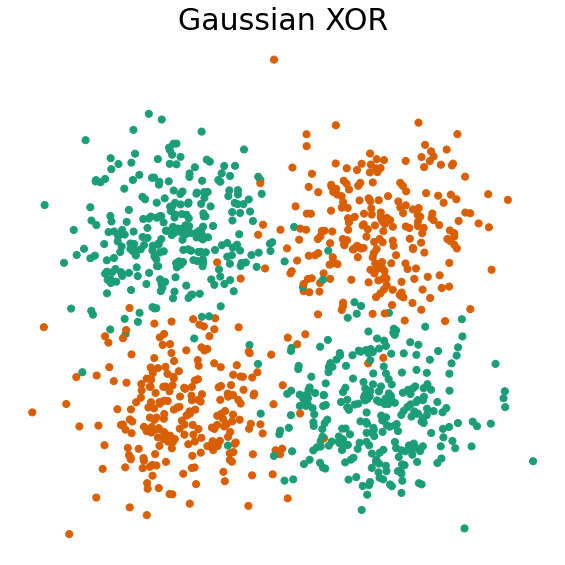

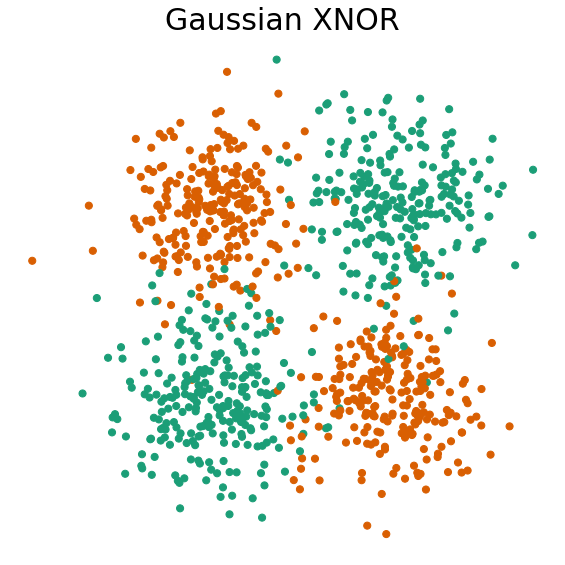

In [2]:
# call function to return gaussian xor and xnor data:
X_xor, y_xor = generate_gaussian_parity(1000)
X_xnor, y_xnor = generate_gaussian_parity(1000, angle_params=np.pi/2)

# plot and format:
fn.plot_xor_xnor(X_xor, y_xor, 'Gaussian XOR')
fn.plot_xor_xnor(X_xnor, y_xnor, 'Gaussian XNOR')

## Experiment

In [3]:
# define hyperparameters:
mc_rep = 10
n_test = 1000
n_trees = 5
n_xor = (100*np.arange(0.5, 7.50, step=0.25)).astype(int)
n_xnor = (100*np.arange(0.25, 7.50, step=0.25)).astype(int)

In [4]:
# running the experiment:

# create empty arrays for storing results
mean_error = np.zeros((6, len(n_xor)+len(n_xnor)))
std_error = np.zeros((6, len(n_xor)+len(n_xnor)))
mean_te = np.zeros((4, len(n_xor)+len(n_xnor)))
std_te = np.zeros((4, len(n_xor)+len(n_xnor)))

# run the experiment
mean_error, std_error, mean_te, std_te = fn.run(mc_rep, n_test, n_trees,n_xor,n_xnor, mean_error, std_error, mean_te, std_te);

## Visualizing the Results

/home/db/venv/UncertaintyForestEnv/lib/python3.8/site-packages/IPython/core/events.py:88: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  func(*args, **kwargs)
/home/db/venv/UncertaintyForestEnv/lib/python3.8/site-packages/IPython/core/pylabtools.py:128: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


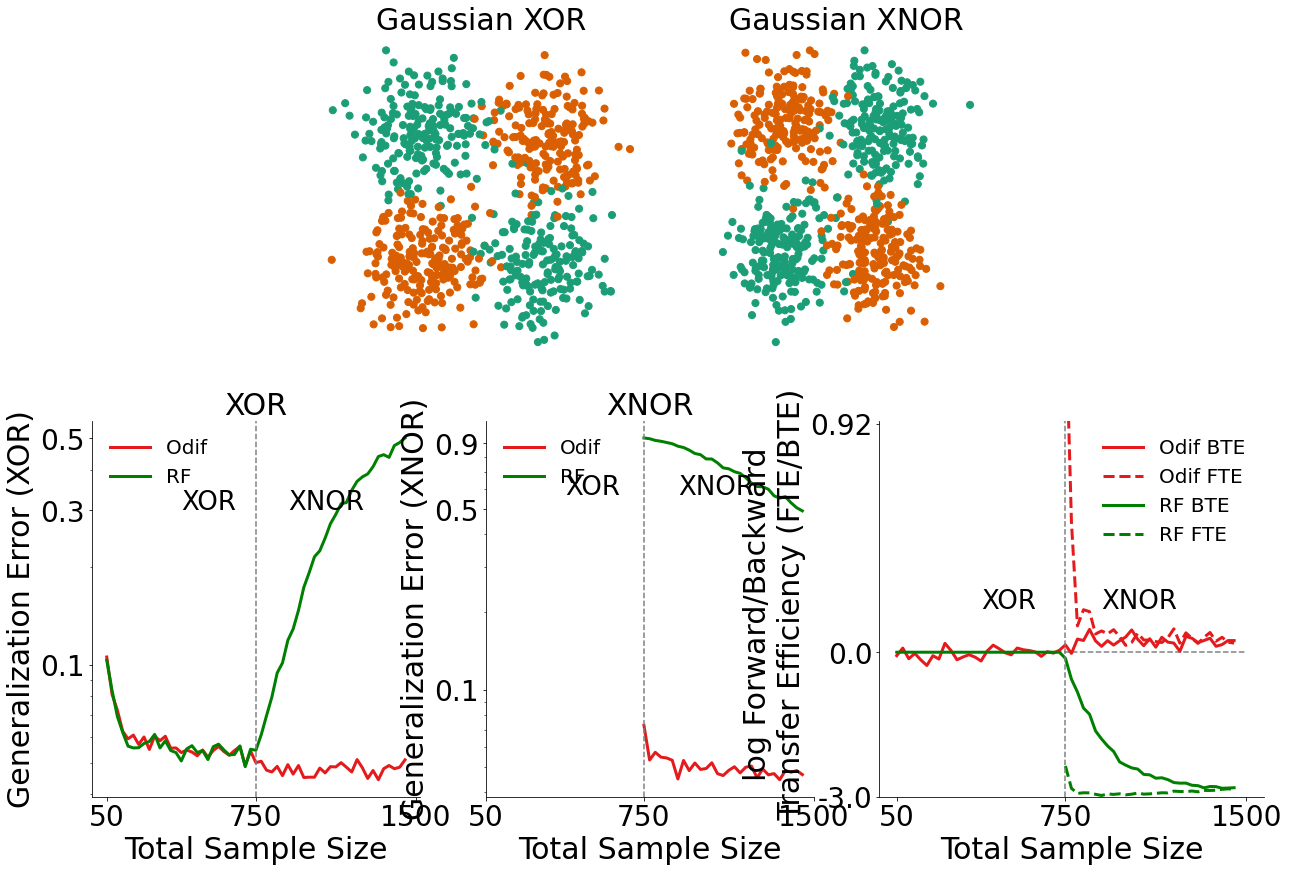

In [5]:
# plot data
%matplotlib inline
fn.plot_error_and_eff(n_xor, n_xnor, mean_error, mean_te, 'XOR', 'XNOR')